# **Phishing Website Detection by Machine Learning Techniques**

*Final project of AI & Cybersecurity Course*

## **1. Objective:**
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models and deep neural nets on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.

*This project is worked on Google Collaboratory.*<br>
*The required packages for this notebook are imported when needed.*

## **2. Loading Data:**

The features are extracted and store in the csv file. The working of this can be seen in the 'Phishing Website Detection_Feature Extraction.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe.

In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Loading the data
data0 = pd.read_csv(r"C:\Users\R\Downloads\phishing\DataFilesfile.csv")
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,dns,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Fuzzy_Hashing,Perceptual_Hashing,Label
0,edisonlearning.com,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1
1,insyncvideo.com,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1
2,doctorww.com,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1
3,asx-exs-trade.com,0,0,0,2,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1
4,hexe.in,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [5]:
#Checking the shape of the dataset
data0.shape

(200, 20)

In [6]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'dns',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Fuzzy_Hashing', 'Perceptual_Hashing',
       'Label'],
      dtype='object')

In [7]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Domain              200 non-null    object
 1   Have_IP             200 non-null    int64 
 2   Have_At             200 non-null    int64 
 3   URL_Length          200 non-null    int64 
 4   URL_Depth           200 non-null    int64 
 5   Redirection         200 non-null    int64 
 6   https_Domain        200 non-null    int64 
 7   TinyURL             200 non-null    int64 
 8   Prefix/Suffix       200 non-null    int64 
 9   dns                 200 non-null    int64 
 10  Web_Traffic         200 non-null    int64 
 11  Domain_Age          200 non-null    int64 
 12  Domain_End          200 non-null    int64 
 13  iFrame              200 non-null    int64 
 14  Mouse_Over          200 non-null    int64 
 15  Right_Click         200 non-null    int64 
 16  Web_Forwards        200 no

## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

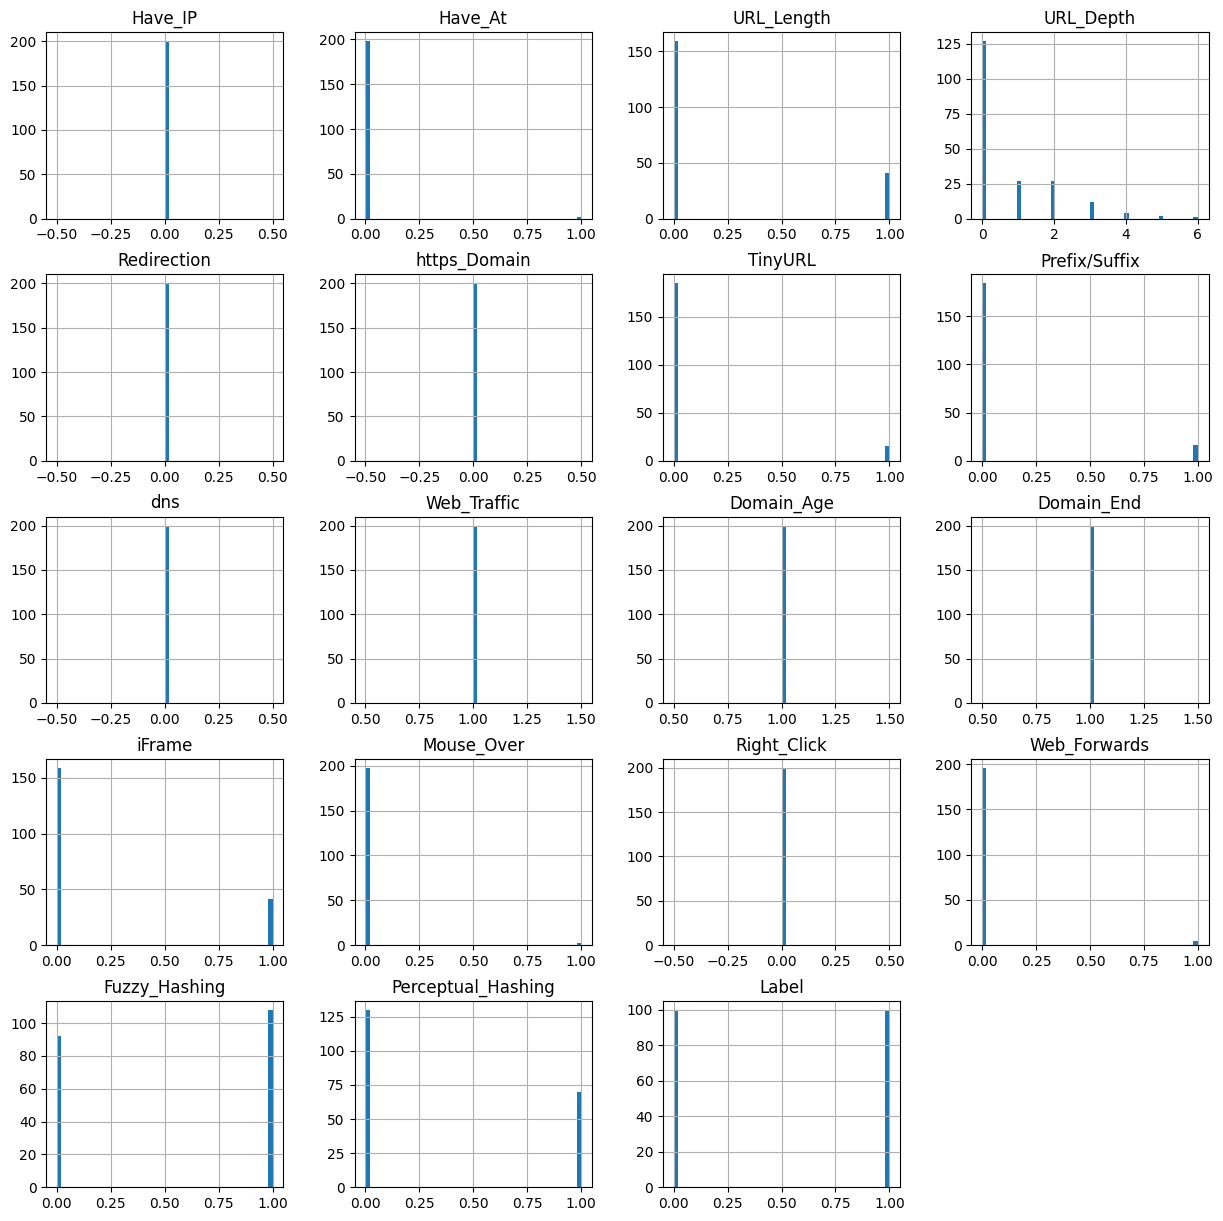

In [8]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [9]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

ValueError: could not convert string to float: 'edisonlearning.com'

<Figure size 1500x1300 with 0 Axes>

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [10]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,dns,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Fuzzy_Hashing,Perceptual_Hashing,Label
count,200.0,200.000000,200.000000,200.000000,200.0,200.0,200.000000,200.000000,200.0,200.0,200.0,200.0,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000
mean,0.0,0.010000,0.205000,0.745000,0.0,0.0,0.075000,0.080000,0.0,1.0,1.0,1.0,0.205000,0.010000,0.0,0.020000,0.540000,0.350000,0.500000
std,0.0,0.099748,0.404715,1.190403,0.0,0.0,0.264052,0.271974,0.0,0.0,0.0,0.0,0.404715,0.099748,0.0,0.140351,0.499648,0.478167,0.501255
min,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.0,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.0,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.0,1.0,1.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.500000
75%,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,1.0,1.0,1.0,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000
max,0.0,1.000000,1.000000,6.000000,0.0,0.0,1.000000,1.000000,0.0,1.0,1.0,1.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [11]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [12]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP               0
Have_At               0
URL_Length            0
URL_Depth             0
Redirection           0
https_Domain          0
TinyURL               0
Prefix/Suffix         0
dns                   0
Web_Traffic           0
Domain_Age            0
Domain_End            0
iFrame                0
Mouse_Over            0
Right_Click           0
Web_Forwards          0
Fuzzy_Hashing         0
Perceptual_Hashing    0
Label                 0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data. 

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [13]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,dns,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Fuzzy_Hashing,Perceptual_Hashing,Label
0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1
1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
2,0,0,1,2,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0
3,0,0,0,2,0,0,0,0,0,1,1,1,0,0,0,1,1,1,1
4,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [14]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((200, 18), (200,))

In [19]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((160, 18), (40, 18))

In [20]:
X_train

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,dns,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Fuzzy_Hashing,Perceptual_Hashing
77,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1
47,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
94,0,0,1,2,0,0,0,0,0,1,1,1,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0
41,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0,0,0,2,0,0,0,0,0,1,1,1,0,0,0,1,1,1
130,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0
134,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0
155,0,0,0,2,0,0,0,0,0,1,1,1,0,0,0,0,0,0


## **7. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression. 

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [21]:
#importing packages
from sklearn.metrics import accuracy_score

In [22]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **7.1. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.
 
In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [23]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [24]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [25]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.894
Decision Tree: Accuracy on test Data: 0.850


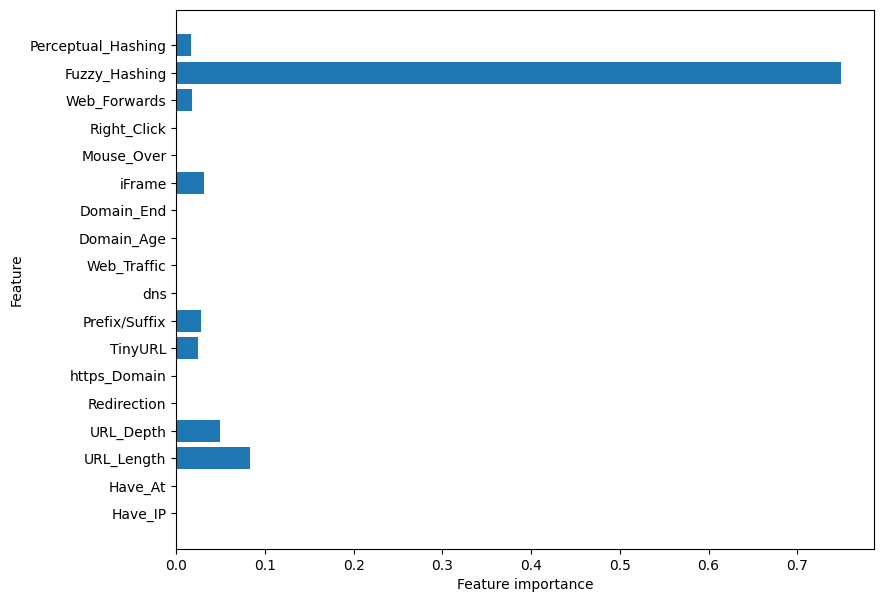

In [26]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [27]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **7.2. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [28]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [29]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [30]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.894
Random forest: Accuracy on test Data: 0.850


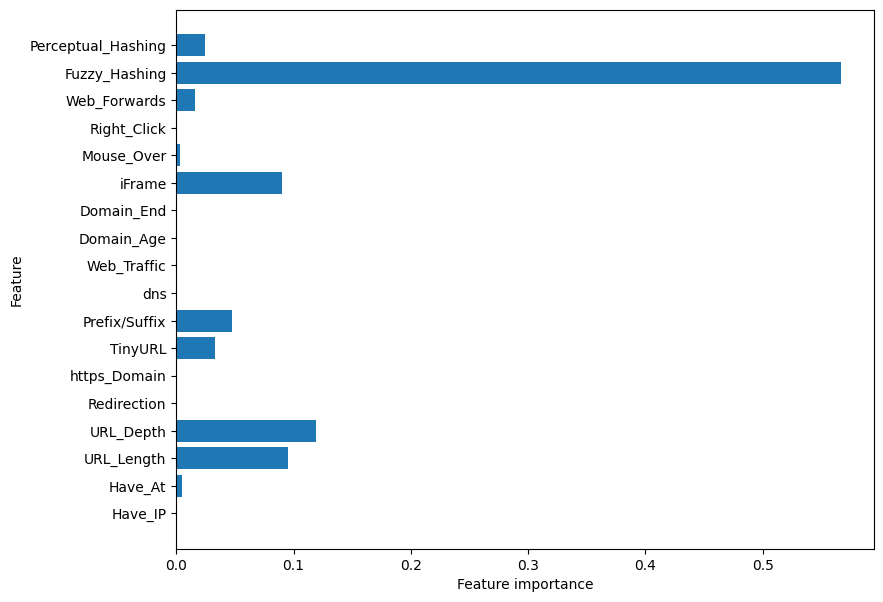

In [31]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [32]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **7.3. Multilayer Perceptrons (MLPs): Deep Learning**
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [33]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

C:\Users\R\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [34]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Performance Evaluation:**

In [35]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.906
Multilayer Perceptrons: Accuracy on test Data: 0.825


**Storing the results:**

In [36]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### **7.4. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [40]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [42]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.900
XGBoost : Accuracy on test Data: 0.850


**Storing the results:**

In [43]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### **7.5. Autoencoder Neural Network**
An auto encoder is a neural network that has the same number of input neurons as it does outputs. The hidden layers of the neural network will have fewer neurons than the input/output neurons. Because there are fewer neurons, the auto-encoder must learn to encode the input to the fewer hidden neurons. The predictors (x) and output (y) are exactly the same in an auto encoder.

In [60]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
#import tensorflow as tf
from keras.models import Model
from sklearn import metrics

ModuleNotFoundError: No module named 'tensorflow.python'

In [61]:
import numpy as np  # If not already imported assuming X_train and X_test are numpy arrays
import pandas as pd  # If not already imported, needed for storing results in a DataFrame
from sklearn.metrics import accuracy_score  # For computing accuracy scores
from keras.layers import Input, Dense  # For building the autoencoder model
from keras.models import Model  # For creating the autoencoder model
from keras import regularizers  # For specifying regularizers in the autoencoder

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

In [ ]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=64, shuffle=True, validation_split=0.2) 

**Performance Evaluation:**

In [ ]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

### **7.6. Support Vector Machines**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

In [ ]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [45]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.625
SVM : Accuracy on test Data: 0.000


**Storing the results:**

In [46]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [47]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.750,0.5
1,Random Forest,0.750,0.0
2,Multilayer Perceptrons,0.750,0.5
3,XGBoost,0.625,0.0
4,AutoEncoder,0.250,0.0
5,SVM,0.625,0.0


In [48]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.750,0.5
2,Multilayer Perceptrons,0.750,0.5
1,Random Forest,0.750,0.0
3,XGBoost,0.625,0.0
5,SVM,0.625,0.0
4,AutoEncoder,0.250,0.0


For the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

So, saving the model for future use.

In [49]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

**Testing the saved model:**

In [50]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## **9. References**
* https://blog.keras.io/building-autoencoders-in-keras.html
* https://en.wikipedia.org/wiki/Autoencoder
* https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
* https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
* https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/

In [51]:
# Save the Multilayer Perceptrons model as an h5 file
from keras.models import Sequential  # For defining the model architecture
from keras.layers import Dense  # For adding layers to the model

mlp.save('MLP.h5')

AttributeError: 'MLPClassifier' object has no attribute 'save'

In [52]:
import tensorflow as tf
from tensorflow.keras.models import save_model

# Reshaping the y_train
y_train_binary = tf.keras.utils.to_categorical(y_train, num_classes=8)

# Instantiate the MLPClassifier
tf_mlp = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

tf_mlp.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

tf_mlp.fit(X_train, y_train_binary, epochs=50, batch_size=64, shuffle= True)

# Save the TensorFlow MLPClassifier as an HDF5 file
save_model(tf_mlp, 'MLP.h5')

Epoch 1/50


C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step - accuracy: 0.0000e+00 - loss: 2.3053
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 2.2840
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 2.2640
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 2.2444
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 2.2255
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 2.2074
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 2.1900
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 2.1731
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 2.1567
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 2.1417
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 2.1274
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step -

## Saving the model as pickle file

In [53]:
import pickle

# Save the trained model to a file
with open('mlp_model.pkl', 'wb') as file:
    pickle.dump(mlp, file)


## Preprocessing

In [57]:
# 1.Domain of the URL (Domain) 
import re

def get_domain(url):  
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  return domain

# 2.Checks for IP address in URL (Have_IP)
def having_ip(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip
# 3.Checks the presence of @ in URL (Have_At)
def have_at_sign(url):
  if "@" in url:
    at = 1    
  else:
    at = 0    
  return at

# 4.Finding the length of URL and categorizing (URL_Length)
def get_length(url):
  if len(url) < 54:
    length = 0            
  else:
    length = 1            
  return length
# 5.Gives number of '/' in URL (URL_Depth)
def get_depth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth
# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0
# 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def http_domain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0
# 8. Checking for Shortening Services in URL (Tiny_URL)
def tiny_url(url):#listing shortening services
    shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0
# 9.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefix_suffix(url):
    if '-' in urlparse(url).netloc:
        return 1            
    else:
        return 0 
import requests

def web_traffic(url):
    try:
        querystring = {"domain": url}
        headers = {
            "X-RapidAPI-Key": "cd4733fedbmsh6f2cfc21cf195f2p1d088djsn84e6c824c74e",
            "X-RapidAPI-Host": "similar-web.p.rapidapi.com"
        }
        response = requests.get("https://similar-web.p.rapidapi.com/get-analysis", headers=headers, params=querystring)
        data = response.json()
        rank = data['GlobalRank']['Rank']
        rank = int(rank)
    except (requests.exceptions.RequestException, ValueError, KeyError):
        rank = 1

    if rank < 100000:
        return 1
    else:
        return 0

# 15. IFrame Redirection (iFrame)
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

# 16.Checks the effect of mouse over on status bar (Mouse_Over)
def mouse_over(response): 
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0
# 17.Checks the status of the right click attribute (Right_Click)
def right_click(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1
# 18.Checks the number of forwardings (Web_Forwards)    
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1
# Function to handle HTTP request with retries
def get_http_response(url):
    try:
        response = requests.get(url, timeout=5)  # Set a timeout of 5 seconds
        return response
    except ConnectionError as e:
        print(f"ConnectionError: Failed to make HTTP request to {url}. Exception: {e}")
        return None
    except SSLError as e:
        print(f"SSLError occurred while fetching URL: {url}. Exception: {e}")
        return None
    except Timeout as e:
        print(f"Timeout: Request timed out while making HTTP request to {url}. Exception: {e}")
        return None

In [58]:
import requests
import ast
from urllib.parse import urlparse
from datetime import datetime

def extract_features(url, domain_name=None):
    features = []


    
    # Address bar based features
    features.append(having_ip(url))
    features.append(have_at_sign(url))
    features.append(get_length(url))
    features.append(get_depth(url))
    features.append(redirection(url))
    features.append(http_domain(url))
    features.append(tiny_url(url))
    features.append(prefix_suffix(url))

    # Domain based features
    dns = 0
    dns_age = 0
    dns_end = 0
    features.append(dns)
    features.append(dns_age)
    features.append(dns_end)
    features.append(web_traffic(url))
    response = get_http_response(url)

    # HTML & Javascript based features
    if response is not None:
        features.append(iframe(response))
        features.append(mouse_over(response))
        features.append(right_click(response))
        features.append(forwarding(response))
    else:
        # If response is None, set these features to 0 or None
        features.extend([0, 0, 0, 0])

    return features


In [61]:
import pickle
from requests.exceptions import SSLError, Timeout  # Add this import for SSLError and Timeout

# Load the model from the file
with open('mlp_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Assuming you have new data in a variable called 'new_data'
# Make predictions on the new data
new_data = extract_features("http://1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/")
new_data = [new_data]
new_data = np.array(new_data)
print(new_data)

Timeout: Request timed out while making HTTP request to http://1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/. Exception: HTTPConnectionPool(host='1337x.to', port=80): Max retries exceeded with url: /torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/ (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x0000029219E72020>, 'Connection to 1337x.to timed out. (connect timeout=5)'))
[[0 0 1 3 0 0 0 0 0 0 0 1 0 0 0 0]]


In [62]:
predictions = loaded_model.predict(new_data)

# 'predictions' now contains the predicted labels for the new data
print(predictions)

[0]


C:\Users\sudha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
